In [1]:
import pandas
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
dataframe = pandas.read_excel("usd_rate.xlsx")
rate = dataframe.curs

In [3]:
past = 7 # Для обучения будем брать данные за 7 дней из прошлого
# Будем пытаться на их основе спрогнозировать курс на завтра

In [4]:
def models(prediction, y_test):
    plt.plot(prediction, label="Prediction")
    plt.plot(list(y_test), label="Real")
    plt.legend()
    mae = mean_absolute_error(prediction, y_test)
    print(f"MAE = {mae}")
    

In [5]:
length = len(rate)
count = length - past

In [6]:
past_days = []

In [7]:
current_day = []

In [8]:
for day in range(past, length):
    slc_x = list(rate[(day-past):day])
    past_days.append(slc_x) # rate[4:33]
    slc_y = rate[day]
    current_day.append(slc_y) # rate[33]

In [9]:
past_columns = []

In [10]:
for i in range(past):
    past_columns.append(f"past_{i}")

In [11]:
x = pandas.DataFrame(data=past_days, columns=past_columns)
# То, на основе чего мы делаем предсказание

In [12]:
y = pandas.Series(current_day, name='target')
# То, что мы пытаемся предсказать

In [13]:
# Обучающая выборка, "Учебник"
x_train = x[:-10]
y_train = y[:-10]

In [14]:
# Тестовая выборка, "Экзамен"
x_test = x[-10:]
y_test = y[-10:]

In [15]:
regressor = LinearRegression()
# Модель линейной регрессии

In [16]:
grid = {}

In [17]:
GS = GridSearchCV(regressor, grid, cv = 10, scoring = 'neg_mean_absolute_error')

In [18]:
GS.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LinearRegression(), param_grid={},
             scoring='neg_mean_absolute_error')

In [19]:
best_model = GS.best_estimator_

In [20]:
prediction = best_model.predict(x_test)

MAE = 0.43071659150780733


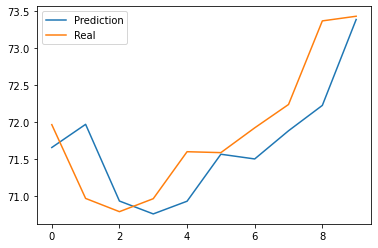

In [21]:
models(prediction, y_test)

In [ ]:
print("Введите курс доллара за эту неделю: ")
# Тестовая выборка, "Экзамен"
x_test = [[]]
for i in range(7):
    day = float(input(str(i+1) + " день: "))
    x_test[0].append(day)

Введите курс доллара за эту неделю: 


In [ ]:
x = pandas.DataFrame(data=x_test, columns=past_columns)

In [ ]:
prediction = best_model.predict(x_test)

In [ ]:
print("$$$ Доллар будет стоить: " + str(prediction[0]) + " рублей" )